## Autoencoder Demo

In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import keras
from keras.layers import Activation,Dense,Conv2D,Conv2DTranspose
from keras.models import Sequential
from keras.preprocessing import image
from keras.optimizers import Adam, SGD, RMSprop
import os
%matplotlib inline

In [4]:
os.getcwd()

'/Users/Edureka'

In [13]:

pth='/Users/Edureka/Python/My Work/HeadCount/image_data'

In [16]:
os.chdir(pth)
allfiles=os.listdir(pth)
templist=[]
#opencv/cv2, PIL, libraries for image manipulation/conversion
for file in tqdm(allfiles):
    img=image.load_img(file,target_size=(64,64,3))
    img=image.img_to_array(img)
    img=img/255
    templist.append(img)
X=np.array(templist)

100%|██████████| 8196/8196 [01:08<00:00, 119.06it/s]


In [17]:
X.shape

(8196, 64, 64, 3)

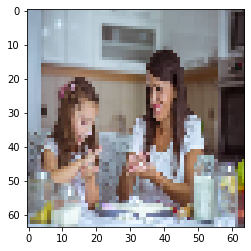

In [21]:
plt.imshow(X[11])

In [22]:
train_length=round(len(X)*0.75)
test_length=round(len(X)*0.25)

In [23]:
xtrain=X[0:train_length]
xtest=X[0:test_length]

In [24]:
len(xtrain),len(xtest)

(6147, 2049)

In [26]:
noise_factor=0.1
noise_train_dataset=[]
noise_test_dataset=[]
for img in xtrain:
    noisy_img=img+noise_factor*np.random.randn(*img.shape)
    noisy_img=np.clip(noisy_img,0,1)
    noise_train_dataset.append(noisy_img)
for img in xtest:
    noisy_img=img+noise_factor*np.random.randn(*img.shape)
    noisy_img=np.clip(noisy_img,0,1)
    noise_test_dataset.append(noisy_img)

In [28]:
noise_train_dataset=np.array(noise_train_dataset)
noise_test_dataset=np.array(noise_test_dataset)


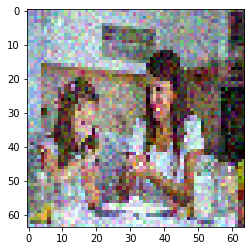

In [29]:
plt.imshow(noise_train_dataset[11])

### Create the autoencoder model

In [30]:
autoencoder=Sequential()

In [36]:
#Encoder Layer
autoencoder.add(Conv2D(4,kernel_size=3,strides=1,padding='same',input_shape=(64,64,3)))
autoencoder.add(Conv2D(2,kernel_size=3,strides=1,padding='same'))

# Decoder Layer
autoencoder.add(Conv2DTranspose(2,kernel_size=3,strides=1,padding='same'))
autoencoder.add(Conv2DTranspose(3,kernel_size=3,strides=1,padding='same',activation='sigmoid'))

In [37]:
autoencoder.compile(loss='mse',optimizer=Adam(lr=0.0001))

In [38]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 4)         112       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 2)         74        
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 2)         38        
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 4)         76        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 4)         148       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 2)         74        
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 64, 64, 2)        

In [39]:
autoencoder.fit(noise_train_dataset,xtrain,epochs=10,batch_size=10,validation_data=(noise_test_dataset,xtest))


Train on 6147 samples, validate on 2049 samples
Epoch 1/10
6147/6147 [==============================] - 92s 15ms/step - loss: 0.0734 - val_loss: 0.0338
Epoch 2/10
6147/6147 [==============================] - 93s 15ms/step - loss: 0.0296 - val_loss: 0.0261
Epoch 3/10
6147/6147 [==============================] - 94s 15ms/step - loss: 0.0243 - val_loss: 0.0227
Epoch 4/10
6147/6147 [==============================] - 81s 13ms/step - loss: 0.0218 - val_loss: 0.0208
Epoch 5/10
6147/6147 [==============================] - 68s 11ms/step - loss: 0.0201 - val_loss: 0.0192
Epoch 6/10
6147/6147 [==============================] - 67s 11ms/step - loss: 0.0187 - val_loss: 0.0180
Epoch 7/10
6147/6147 [==============================] - 78s 13ms/step - loss: 0.0176 - val_loss: 0.0171
Epoch 8/10
6147/6147 [==============================] - 64s 10ms/step - loss: 0.0168 - val_loss: 0.0164
Epoch 9/10
6147/6147 [==============================] - 54s 9ms/step - loss: 0.0161 - val_loss: 0.0158
Epoch 10/10
6147

In [40]:
predicted=autoencoder.predict(noise_test_dataset)

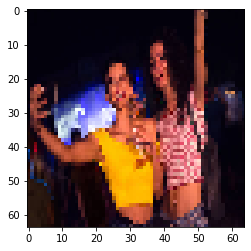

In [41]:
plt.imshow(xtest[15])

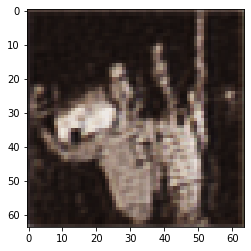

In [42]:
plt.imshow(predicted[15])